In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from datetime import datetime

C:\Users\sudes\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\sudes\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
dataset = pd.read_excel("AirPassengersData.xlsx", 
                        parse_dates=['Month'], 
                        index_col= 'Month')
dataset.reset_index(inplace= True)
dataset.head()

,Month,Passengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


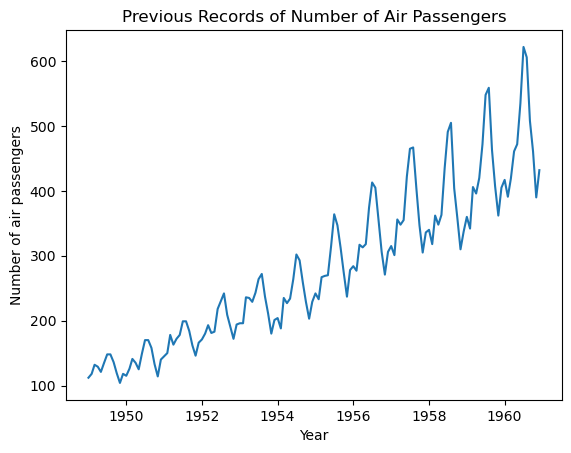

In [3]:
plt.xlabel('Year')
plt.ylabel('Number of air passengers')
plt.title('Previous Records of Number of Air Passengers')
plt.plot(dataset['Month'], dataset['Passengers'])
plt.show()

In [4]:
# ADDITIVE MODEL
add_result = seasonal_decompose(dataset['Passengers'], 
                                model= 'additive', 
                                period= 30)

In [5]:
# DATASET OF ADDITIVE MODEL
new_add_dataset = pd.concat([add_result.observed, 
                             add_result.seasonal, 
                             add_result.trend, 
                             add_result.resid ], 
                            axis= 1)
new_add_dataset.columns = ['Passengers', 
                           'Seasionlity', 
                           'Trend', 
                           'Residual']
new_add_dataset.head(20)[15:]

,Passengers,Seasionlity,Trend,Residual
15,135.0,-12.554074,140.850000,6.704074
16,125.0,-32.020741,143.650000,13.370741
17,149.0,-3.595741,145.866667,6.729074
18,170.0,13.150093,147.283333,9.566574
19,170.0,1.041759,148.250000,20.708241


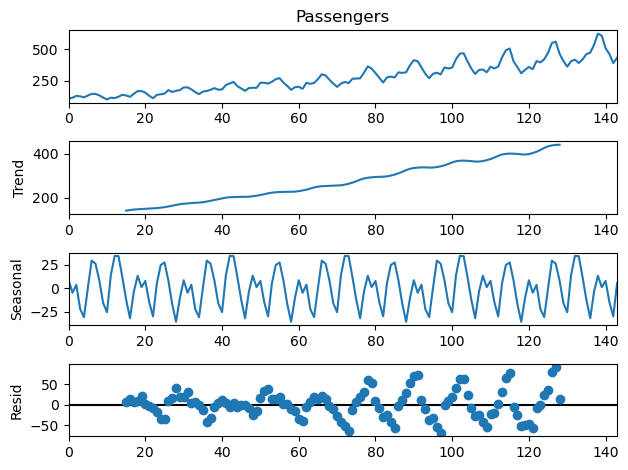

In [6]:
# PLOTING ADDITIVE MODEL
add_result.plot()
plt.show()

In [7]:
# MULTIPLICATIVE MODEL
mul_result = seasonal_decompose(dataset['Passengers'], 
                                model= 'multiplicative', 
                                period= 30)

In [8]:
# DATASET OF MULTIPLICATIVE MODEL
new_add_dataset = pd.concat([mul_result.observed, 
                             mul_result.seasonal, 
                             mul_result.trend, 
                             mul_result.resid], 
                            axis= 1)
new_add_dataset.columns = ['Passengers', 
                           'Seasionlity', 
                           'Trend', 
                           'Residual']
new_add_dataset.head(20)[15:]

,Passengers,Seasionlity,Trend,Residual
15,135.0,0.953468,140.850000,1.005242
16,125.0,0.875524,143.650000,0.993885
17,149.0,0.995207,145.866667,1.026400
18,170.0,1.068739,147.283333,1.080000
19,170.0,1.030159,148.250000,1.113140


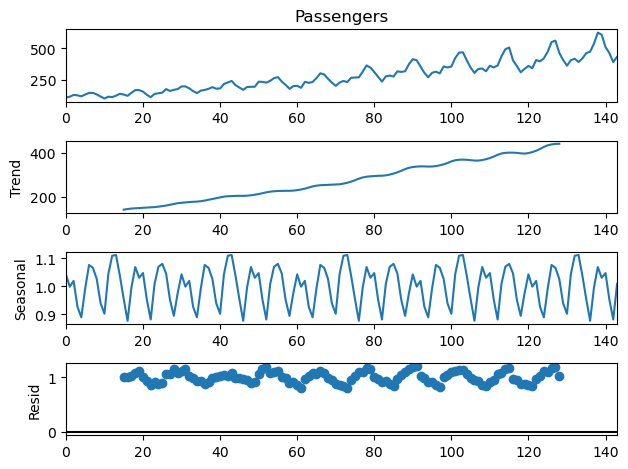

In [9]:
# PLOTTING MULTIPLICATIVE MODEL
mul_result.plot()
plt.show()

In [10]:
# CONVERT OBJECT DATA INTO INT DATA:
dataset['Month'] = pd.to_datetime(dataset['Month'], 
                                  infer_datetime_format= True)
dataset = dataset.set_index(['Month'])

C:\Users\sudes\AppData\Local\Temp\ipykernel_1740\2863322372.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  dataset['Month'] = pd.to_datetime(dataset['Month'], infer_datetime_format= True)


In [11]:
# DETERMING OF ROLLING STATISTICS:
rolmean = dataset.rolling(window= 12).mean()
rolstd = dataset.rolling(window= 12).std()

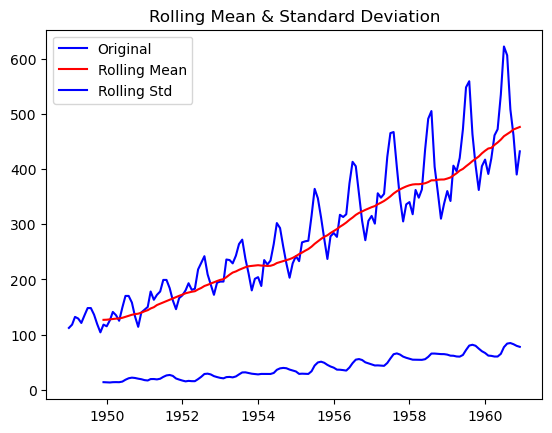

In [12]:
# PLOT ROLLING STATISTICS:
orig = plt.plot(dataset, color = 'blue', label = 'Original')
mean = plt.plot(rolmean, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color = 'blue', label = 'Rolling Std')
plt.legend(loc= 'best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block= False)